# Stock Market Prediction And Forecasting Using Stacked LSTM task2

# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

# import dataset

In [2]:
dataset = pd.read_csv('C:/Users/Dell/OneDrive/Desktop/stockprice_master_NSE-TATAGLOBAL.csv')

In [3]:
dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
dataset.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
dataset.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
dataset.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [8]:
dataset.shape

(2035, 8)

In [9]:
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [10]:
duplicates = dataset.duplicated()
duplicates.value_counts()

False    2035
Name: count, dtype: int64

In [11]:
srt = dataset.sort_values(by='Date')
srt.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [12]:
srt.reset_index(inplace=True)
srt.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [13]:
srt.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


# Data Visualization

plotting the graph for the date and close

<Axes: >

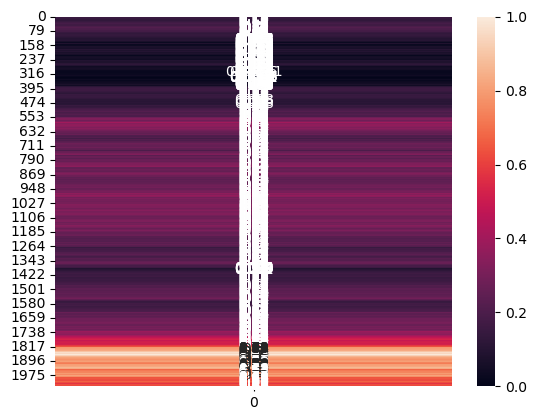

In [77]:
plt.Figure(figsize = (6,6))
sns.heatmap(close_srt,annot=True)

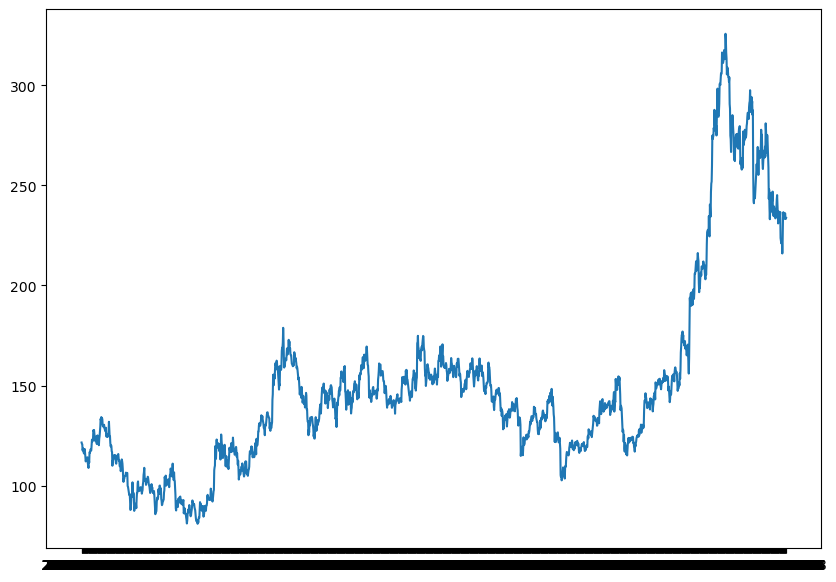

In [14]:
plt.figure(figsize=(10,7))
plt.plot(srt['Date'],srt['Close'])

In [15]:
close_srt  = srt['Close']
close_srt

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [16]:
duplicates=dataset.duplicated()
duplicates.value_counts()

False    2035
Name: count, dtype: int64

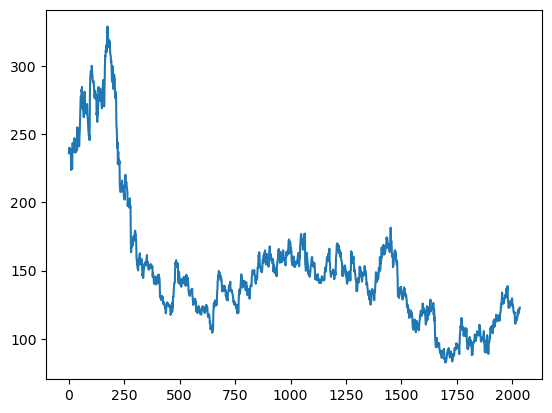

In [17]:
dataset_high = dataset.reset_index()['High']
plt.plot(dataset_high)

# Feature Scalling(MinMax Scaler)

In [18]:
Scaler = MinMaxScaler(feature_range=(0,1))
close_srt = Scaler.fit_transform(np.array(close_srt).reshape(-1,1))
close_srt

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

# Splitting the Dataset

In [19]:
train_size = int(len(close_srt)*0.7)
test_size = len(close_srt) - train_size
train_data,test_data = close_srt[0:train_size,:],close_srt[train_size:len(close_srt),:1]

In [20]:
train_data.shape

(1424, 1)

In [21]:
test_data.shape

(611, 1)

# convert an array of values into dataset matrix

In [22]:
def create_dataset(dataset, time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        return np.array(dataX), np.array(dataY)

# Reshaping dataset

In [27]:
time_step = 100
X_train,Y_train = create_dataset(train_data, time_step)
X_test,Y_test = create_dataset(test_data, time_step)

In [28]:
print(X_train.shape), print(Y_train.shape)

(1, 100)
(1,)


(None, None)

In [29]:
print(X_test.shape), print(Y_test.shape)

(1, 100)
(1,)


(None, None)

In [30]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [31]:
X_train

array([[[0.16584967],
        [0.16319444],
        [0.1621732 ],
        [0.14971405],
        [0.15400327],
        [0.15236928],
        [0.14562908],
        [0.14338235],
        [0.14848856],
        [0.15257353],
        [0.14522059],
        [0.13521242],
        [0.12724673],
        [0.13031046],
        [0.12806373],
        [0.13459967],
        [0.12908497],
        [0.13562092],
        [0.12377451],
        [0.1190768 ],
        [0.11397059],
        [0.13112745],
        [0.12479575],
        [0.14603758],
        [0.14501634],
        [0.14726307],
        [0.15196078],
        [0.1503268 ],
        [0.14971405],
        [0.16156046],
        [0.17177288],
        [0.1693219 ],
        [0.16830065],
        [0.17238562],
        [0.19097222],
        [0.18913399],
        [0.19138072],
        [0.18382353],
        [0.17544935],
        [0.17279412],
        [0.16830065],
        [0.17034314],
        [0.17810458],
        [0.16973039],
        [0.16278595],
        [0

In [32]:
X_test

array([[[0.1621732 ],
        [0.15951797],
        [0.16707516],
        [0.15992647],
        [0.16053922],
        [0.16441993],
        [0.16687092],
        [0.1693219 ],
        [0.16074346],
        [0.15972222],
        [0.16401144],
        [0.15727124],
        [0.14705882],
        [0.14460784],
        [0.15175654],
        [0.15441176],
        [0.15216503],
        [0.14848856],
        [0.15522876],
        [0.15767974],
        [0.1621732 ],
        [0.16094771],
        [0.16339869],
        [0.15931373],
        [0.15972222],
        [0.16115196],
        [0.16666667],
        [0.15747549],
        [0.15379902],
        [0.14848856],
        [0.15114379],
        [0.1503268 ],
        [0.15155229],
        [0.15645425],
        [0.16033497],
        [0.1566585 ],
        [0.15686275],
        [0.17749183],
        [0.17973856],
        [0.1744281 ],
        [0.19281046],
        [0.18607026],
        [0.18811275],
        [0.18443627],
        [0.18280229],
        [0

# Creatin the Stacked LSTM Model

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
from keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [35]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


# Prediction and checking Performance

In [43]:
model.fit(X_train,Y_train,epochs=80,batch_size=84,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/80
1/1 [==============================] - 0s 302ms/step - loss: 5.1088e-07 - val_loss: 0.0111
Epoch 2/80
1/1 [==============================] - 0s 237ms/step - loss: 2.1458e-07 - val_loss: 0.0111
Epoch 3/80
1/1 [==============================] - 0s 215ms/step - loss: 3.0721e-08 - val_loss: 0.0112
Epoch 4/80
1/1 [==============================] - 0s 218ms/step - loss: 1.1666e-08 - val_loss: 0.0113
Epoch 5/80
1/1 [==============================] - 0s 245ms/step - loss: 1.2246e-07 - val_loss: 0.0113
Epoch 6/80
1/1 [==============================] - 0s 256ms/step - loss: 2.7312e-07 - val_loss: 0.0113
Epoch 7/80
1/1 [==============================] - 0s 265ms/step - loss: 3.7155e-07 - val_loss: 0.0113
Epoch 8/80
1/1 [==============================] - 0s 267ms/step - loss: 3.6864e-07 - val_loss: 0.0113
Epoch 9/80
1/1 [==============================] - 0s 284ms/step - loss: 2.7421e-07 - val_loss: 0.0113
Epoch 10/80
1/1 [==============================] - 0s 266ms/step - loss: 1.4242e-0

In [46]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

1/1 [==============================] - 0s 68ms/step


In [47]:
train_predict = Scaler.inverse_transform(train_predict)
test_predict = Scaler.inverse_transform(test_predict)

# Calculating the Performance

In [48]:
import math
from sklearn.metrics import mean_squared_error

In [49]:
math.sqrt(mean_squared_error(Y_train,train_predict))

110.82669261857575

In [50]:
math.sqrt(mean_squared_error(Y_test,test_predict))

116.07796652800117

plotting the graph with predict train data, test data with actual data

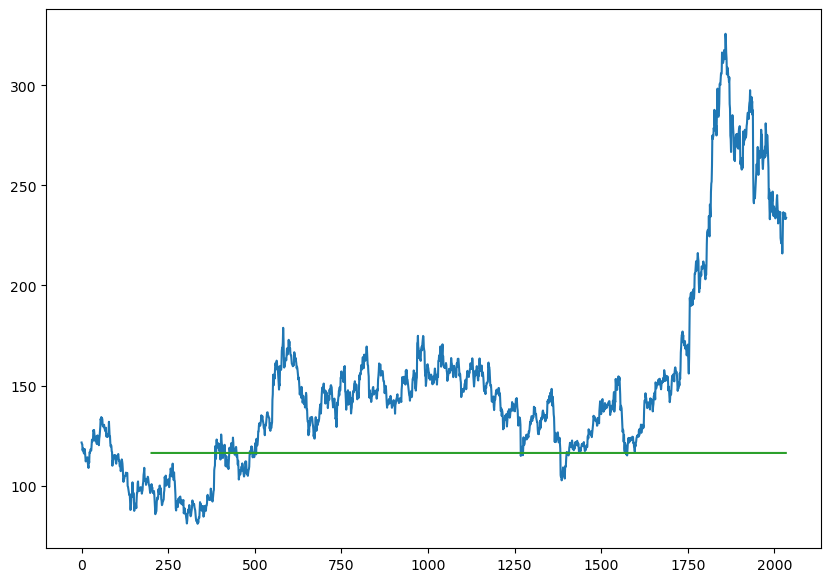

In [51]:
look_back = 100

#shift train prediction for plotting
trainPredictPlot = np.empty_like(close_srt)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(close_srt)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_srt)-1,:] = test_predict
#plot baseline and predictions
plt.figure(figsize=(10,7))
plt.plot(Scaler.inverse_transform(close_srt))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [52]:
len(test_data)

611

In [53]:
pred_input=test_data[511:].reshape(1,-1)
pred_input.shape

(1, 100)

In [54]:
temp_input=list(pred_input)
temp_input=temp_input[0].tolist()

In [55]:
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

predict for 35 days

In [56]:
lst_output=[]
n_steps=100
i=0
while(i<35):
    
    if(len(temp_input)>100):
        #print(temp_input)
        pred_input=np.array(temp_input[1:]) # for last 100 data
        print("{} day input {}".format(i,pred_input))
        pred_input=pred_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(pred_input, verbose=0)
        print("{} dat output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        pred_input = pred_input.reshape((1, n_steps,1))
        yhat = model.predict(pred_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.22622143]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464

ploting last 150 days closing Price

In [57]:
day_new = np.arange(1,50)
day_pred = np.arange(50,101)

In [58]:
day_new.shape

(49,)

In [59]:
day_pred.shape

(51,)

In [60]:
day_new = np.arange(1,101)
day_pred = np.arange(101,151)

In [61]:
day_new.shape

(100,)

In [62]:
day_pred.shape

(50,)

In [63]:
len(dataset)

2035

Appending in a list is done to make continuous graph

In [64]:
print(len(dataset))

2035


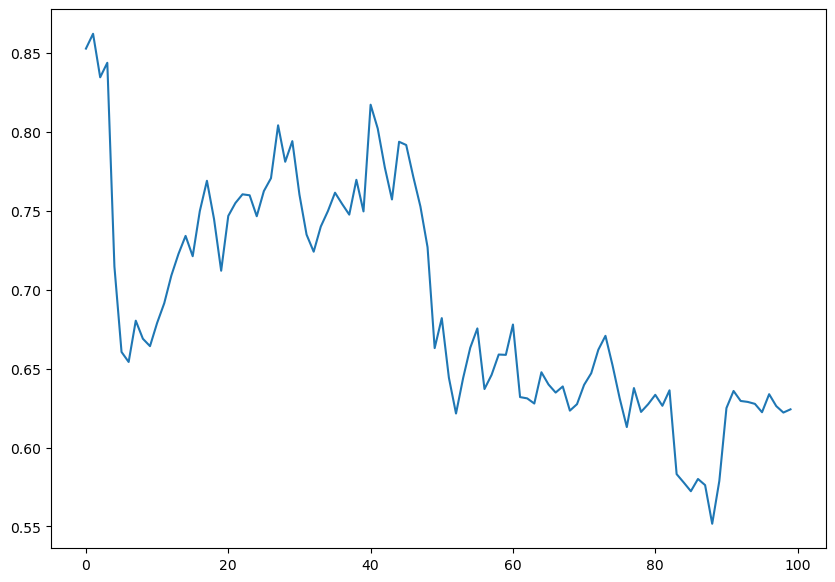

In [67]:
plt.figure(figsize=(10,7))
plt.plot(close_srt[1935:]) #last 100 days output

Plotting the graph with predicted 30 days output

In [72]:
dataset = Scaler.inverse_transform(close_srt).tolist() # undoing Scaling of dataset

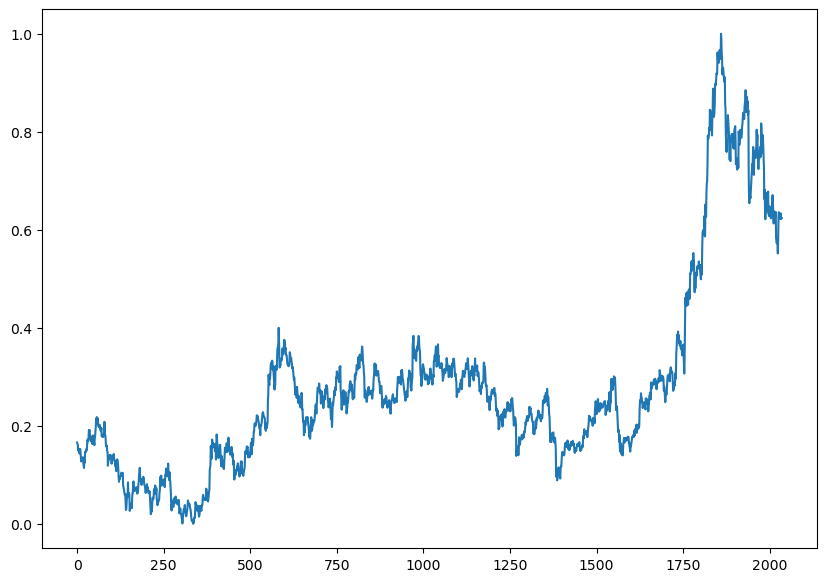

In [73]:
plt.figure(figsize=(10,7))
plt.plot(close_srt)